<a href="https://www.kaggle.com/code/shivankv098/restaurant-revenue-prediction-modelbuilding?scriptVersionId=159575109" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurants-revenue-prediction/Restaurant_revenue (1).csv


In [2]:
df = pd.read_csv('/kaggle/input/restaurants-revenue-prediction/Restaurant_revenue (1).csv')
df

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121
...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,Japanese,19.033585,1,40,249.312034
996,31,20.615496,5.822885,Mexican,17.040990,0,57,110.228767
997,69,17.110656,4.141898,Japanese,44.649315,0,55,312.212552
998,73,37.664722,3.046556,Japanese,27.767358,0,23,272.482204


Data contain 1000 rows and 8 columns.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


* There are no null values.
* There is only one categorical feature which is "Cuisine_Type".


In [4]:
df.describe(include='all')

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Japanese,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,262,NaN,NaN,NaN,NaN
mean,53.271000,30.219120,9.958726,NaN,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,NaN,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,NaN,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,NaN,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,NaN,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,NaN,39.553220,1.000000,76.000000,343.395793


There are lot of insights that can be drawn from the above code:  
(Per Month)

* There are 4 cuisine types.
* Amoung all the cuisine types Japanese cuisine is the most ordered by the customers.
* On an average 53 customers arrives in the restaurant with a range of +-(26).
* Average customer spending is about 29.47 with a range of +-(11.47).
* Average Monthly Revenue is around 268.72 with a range of +-(104).


# **EDA**

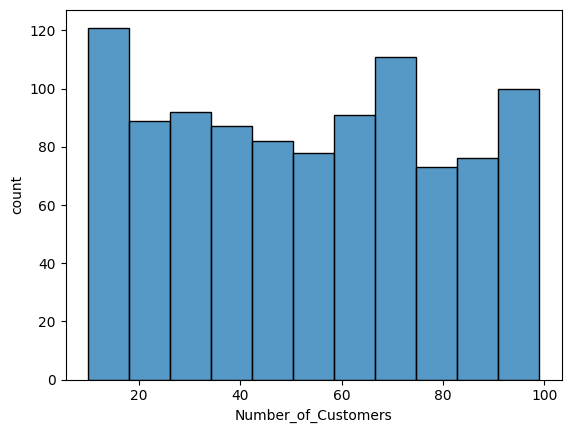

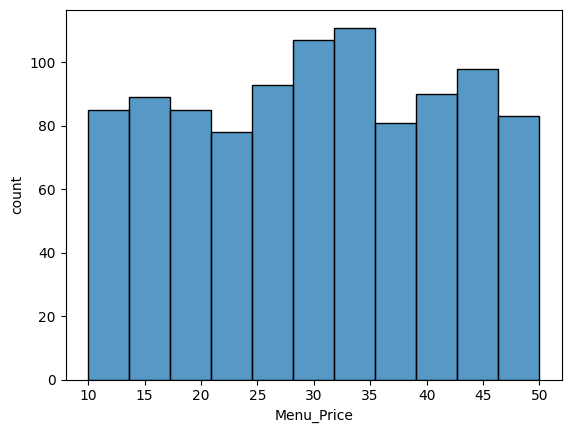

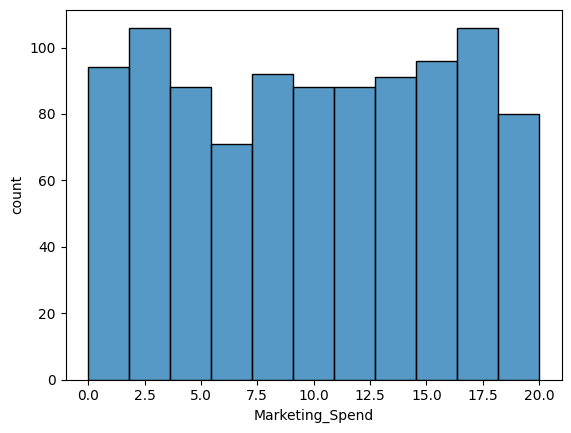

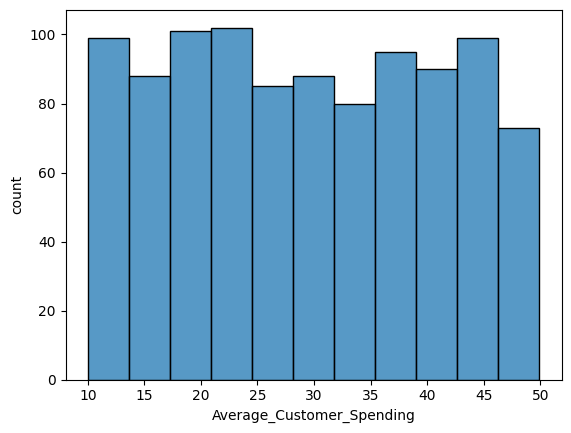

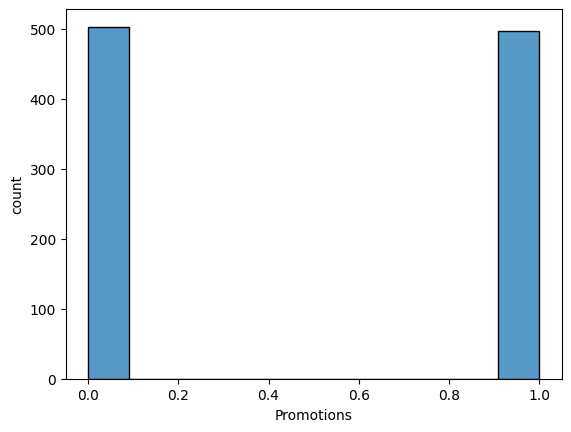

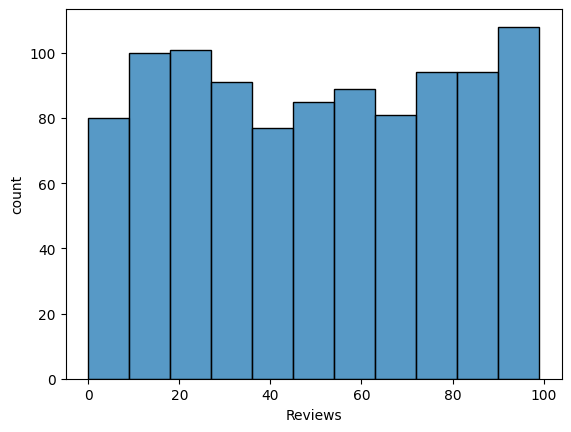

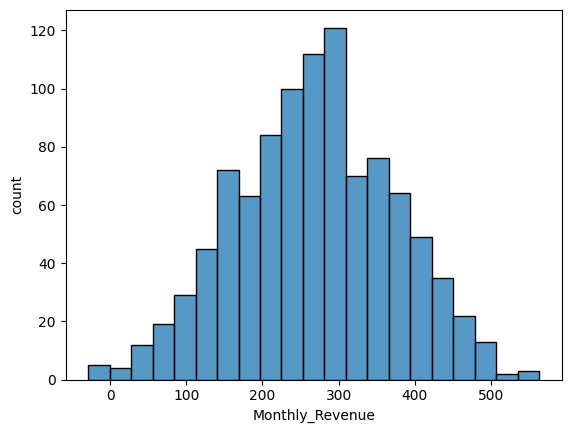

In [5]:
for col in df.columns:
    if df[col].dtype != 'object':
        sns.histplot(df[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

# Checking for outliers

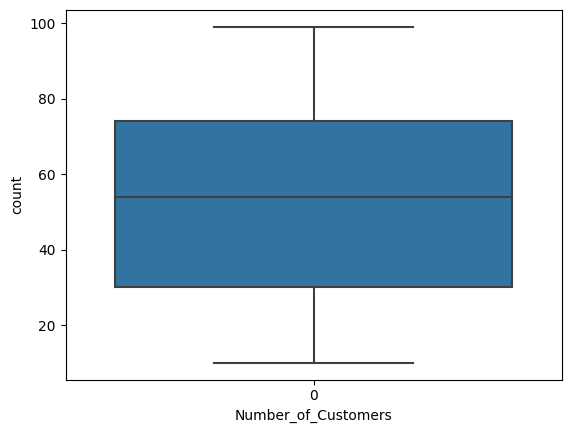

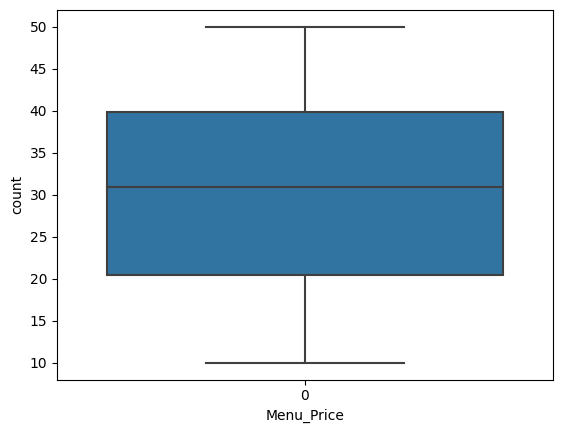

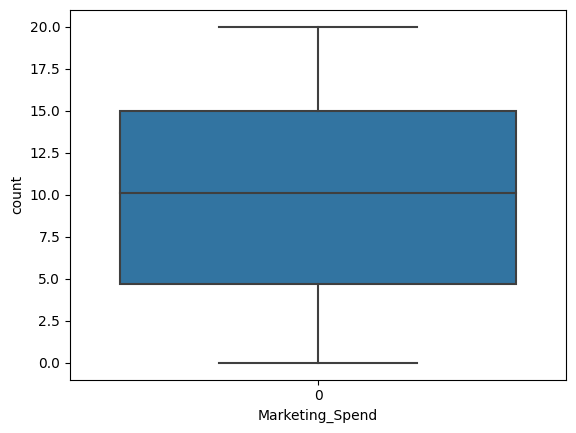

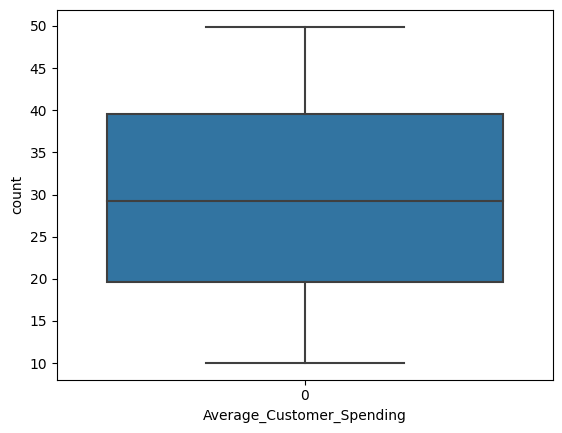

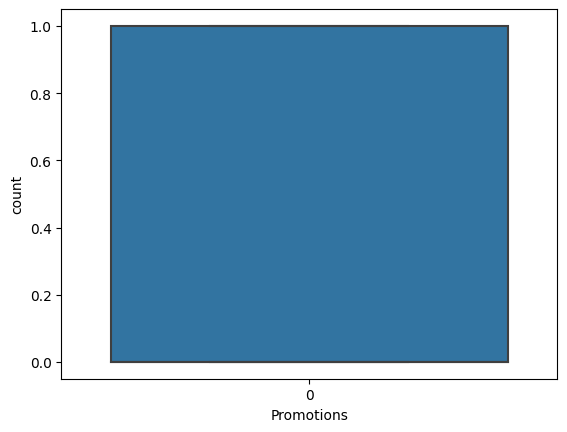

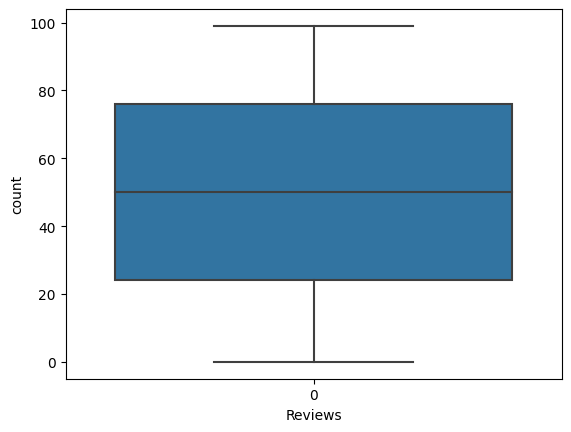

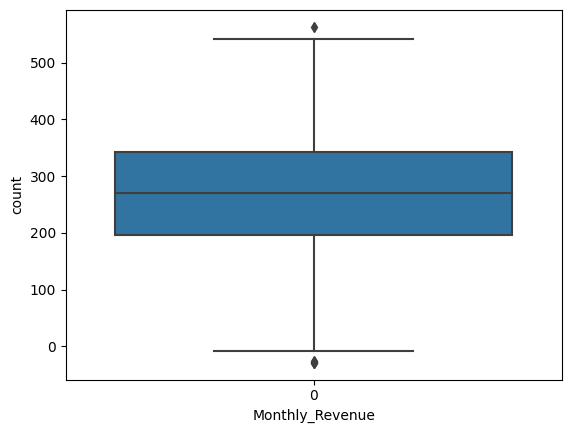

In [6]:
for col in df.columns:
    if df[col].dtype != 'object':
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

# Label Encoding  
Using Label Encoding on "Cuisine_Type" to convert each unique category into an integer.

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Cuisine_Type'] = le.fit_transform(df['Cuisine_Type'])

In [8]:
X = df.iloc[:,:-1]
y = df.Monthly_Revenue

In [9]:
X

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews
0,61,43.117635,12.663793,2,36.236133,0,45
1,24,40.020077,4.577892,1,17.952562,0,36
2,81,41.981485,4.652911,2,22.600420,1,91
3,70,43.005307,4.416053,1,18.984098,1,59
4,30,17.456199,3.475052,1,12.766143,1,30
...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,2,19.033585,1,40
996,31,20.615496,5.822885,3,17.040990,0,57
997,69,17.110656,4.141898,2,44.649315,0,55
998,73,37.664722,3.046556,2,27.767358,0,23


In [10]:
y

0      350.912040
1      221.319091
2      326.529763
3      348.190573
4      185.009121
          ...    
995    249.312034
996    110.228767
997    312.212552
998    272.482204
999    379.973072
Name: Monthly_Revenue, Length: 1000, dtype: float64

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Linear Regression:

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3, random_state=12)

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(x_test)
y_pred

array([208.61406427, 265.70616788, 261.09566525, 157.50167778,
       132.03012586, 208.72208681, 272.47447044, 356.14950943,
       368.47517935, 230.38733589, 326.92867781, 219.11500371,
       474.56561991, 379.49903674, 312.54822312, 231.19841221,
       138.95304228, 241.69066326, 132.19187915, 321.03664721,
        74.69180016, 307.13509919, 168.5054837 , 231.18201185,
       354.54198012, 293.73538842, 357.67083707, 298.0864227 ,
       285.38607985, 291.35650266, 333.48341905, 258.52417459,
       253.46234928, 271.68692632, 340.52679326, 198.48193343,
       190.90593266, 185.13845082, 295.44476355, 319.40114607,
       177.23027279, 138.33394179, 209.62873264, 166.72875539,
       393.1397723 , 272.25363898, 335.16579756, 329.18627958,
       205.13534234, 309.22963963, 370.08815682, 157.10448612,
       246.55371192, 196.7118043 , 338.17034143, 165.30100138,
       324.15542943, 377.05743072, 203.38094881, 292.8350167 ,
       374.77135196, 270.41827013, 169.61844352, 218.98

In [15]:
y_pred_train_lr = lr.predict(x_train)

In [16]:
from sklearn.metrics import *
r2_score_lr_test = r2_score(y_test,y_pred)
r2_score_lr_train = r2_score(y_train,y_pred_train_lr)

The Train r2 score is: 0.6898549170697346
The RMSE score for Train data is: 58.993121769449175


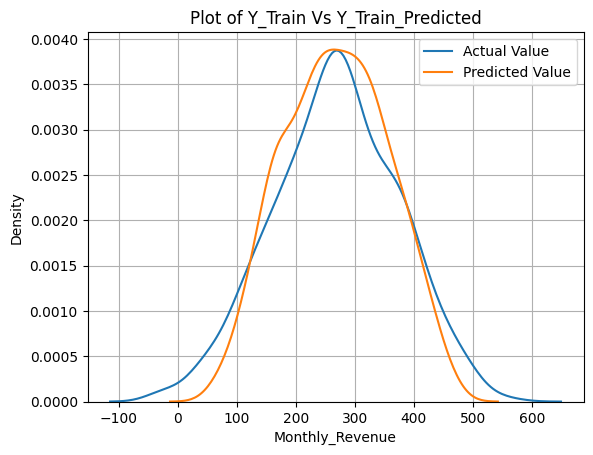

----------------------------------------------------------------------------------------------------
The Test r2 score is: 0.6686232170766755
The RMSE score for Test data is: 57.03354584991667


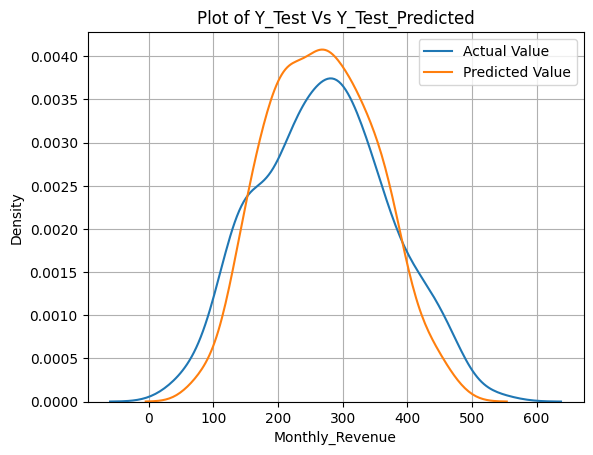

In [17]:
print(f"The Train r2 score is: {r2_score(y_train,y_pred_train_lr)}")  
print(f"The RMSE score for Train data is: {mean_squared_error(y_train,y_pred_train_lr,squared=False)}")  
sns.kdeplot(y_train, label='Actual Value')
sns.kdeplot(y_pred_train_lr, label='Predicted Value')
plt.grid()
plt.title('Plot of Y_Train Vs Y_Train_Predicted')
plt.legend()
plt.show()
print("--"*50)
print(f"The Test r2 score is: {r2_score(y_test,y_pred)}")
print(f"The RMSE score for Test data is: {mean_squared_error(y_test,y_pred,squared=False)}")
sns.kdeplot(y_test, label='Actual Value')
sns.kdeplot(y_pred, label='Predicted Value')
plt.grid()
plt.title('Plot of Y_Test Vs Y_Test_Predicted')
plt.legend()
plt.show()

# Decision Tree Regressor

In [18]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [19]:
y_pred_test_dt = dt.predict(x_test)
y_pred_test_dt

array([221.24617483, 285.82975047, 251.3293657 , 216.45659725,
       151.67789277, 298.42173328, 292.77578967, 413.004619  ,
       242.10514526, 144.76776259, 367.1711011 , 336.29082848,
       496.65368673, 424.04176039, 259.56620036, 141.54352091,
        57.31941977, 230.31295836, 116.90037068, 268.70955919,
       101.80258567, 315.83373535, 275.00921026, 191.05706211,
       365.47491156, 232.86245824, 388.72527963, 367.5586697 ,
       300.9057773 , 372.04628256, 355.54291492, 255.53803161,
       291.08910786, 251.84569806, 350.91203999, 275.00921026,
       201.42298321, 231.04123356, 203.37598814, 229.26251142,
       192.89545761, 155.95209505, 167.10266491, 234.23479866,
       446.21733284, 209.31432483, 308.70837897, 297.53247518,
       278.87058471, 292.97732669, 387.03180436, 227.6197437 ,
       340.70900416, 195.39174263, 462.10452937, 155.95209505,
       372.04628256, 399.71772511, 201.42298321, 300.9057773 ,
       436.28162189, 211.37362547, 278.87058471, 276.06

In [20]:
y_pred_train_dt = dt.predict(x_train)

In [21]:
r2_score_dt_test = r2_score(y_test,y_pred_test_dt)
r2_score_dt_train = r2_score(y_train,y_pred_train_dt)

The Train r2 score is: 1.0
The RMSE score for Train data is: 0.0


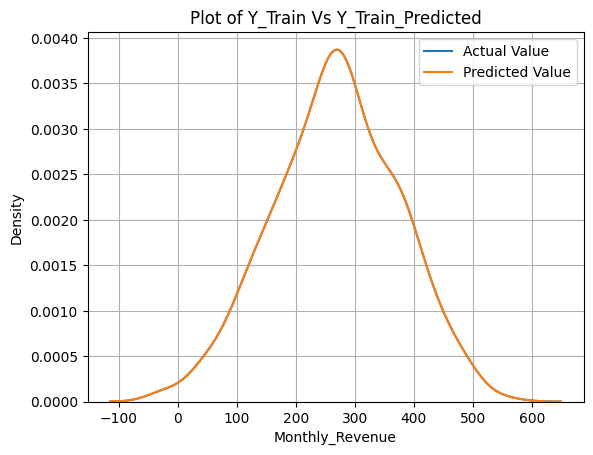

----------------------------------------------------------------------------------------------------
The Test r2 score is: 0.24848946356350587
The RMSE score for Test data is: 85.88886651351075


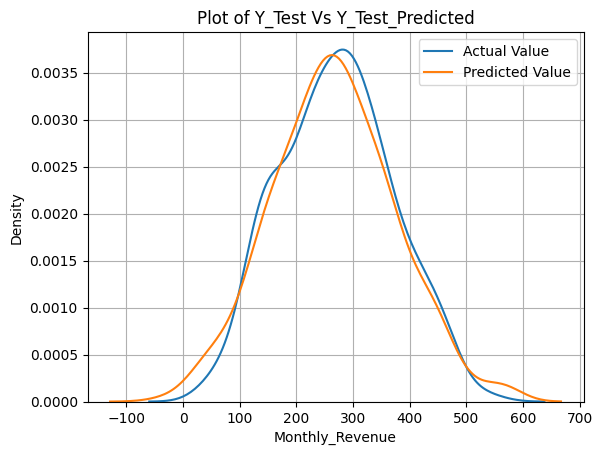

In [22]:
print(f"The Train r2 score is: {r2_score(y_train,y_pred_train_dt)}")  
print(f"The RMSE score for Train data is: {mean_squared_error(y_train,y_pred_train_dt,squared=False)}")  
sns.kdeplot(y_train, label='Actual Value')
sns.kdeplot(y_pred_train_dt,label='Predicted Value')
plt.grid()
plt.title('Plot of Y_Train Vs Y_Train_Predicted')
plt.legend()
plt.show()
print("--"*50)
print(f"The Test r2 score is: {r2_score(y_test,y_pred_test_dt)}")
print(f"The RMSE score for Test data is: {mean_squared_error(y_test,y_pred_test_dt,squared=False)}")
sns.kdeplot(y_test,label='Actual Value')
sns.kdeplot(y_pred_test_dt,label='Predicted Value')
plt.grid()
plt.title('Plot of Y_Test Vs Y_Test_Predicted')
plt.legend()
plt.show()

# Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [24]:
y_pred_test_rfr = rfr.predict(x_test)
y_pred_train_rfr = rfr.predict(x_train)
y_pred_test_rfr


array([224.27432867, 278.44116478, 281.10896425, 153.45456151,
       121.05709741, 199.62343156, 305.34601906, 381.06073028,
       380.45101333, 208.49771241, 329.05314617, 241.9908417 ,
       444.36727398, 351.25780231, 323.20590117, 219.64544187,
       154.85895229, 237.94121029, 154.92590404, 323.5759052 ,
       104.05614189, 334.95866293, 212.26604659, 193.36911367,
       342.97094988, 297.34819881, 340.17208201, 329.91865832,
       286.45181694, 336.17095417, 323.6045096 , 266.68014313,
       248.2493988 , 266.84867825, 334.96533546, 222.85223817,
       202.59001048, 156.8458372 , 263.08614527, 299.24890293,
       169.56920253, 121.65206348, 200.40053442, 175.0515665 ,
       405.08936801, 269.62504317, 320.29616932, 351.16144295,
       213.76286951, 293.47124816, 403.03263976, 182.42853515,
       227.10884384, 196.35844479, 341.04820198, 151.19765853,
       325.52512196, 404.9745688 , 220.94096191, 267.66998756,
       408.56478308, 280.03637688, 205.436673  , 271.53

In [25]:
r2_score_rfr_test = r2_score(y_test,y_pred_test_rfr)
r2_score_rfr_train = r2_score(y_train,y_pred_train_rfr)

The Train r2 score is: 0.9508685615472127
The RMSE score for Train data is: 23.48003111978135


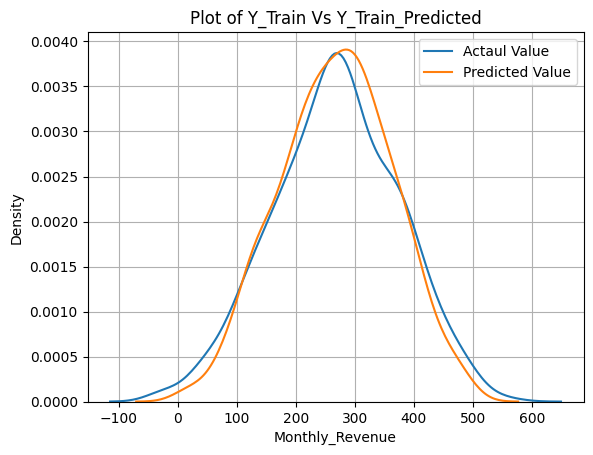

----------------------------------------------------------------------------------------------------
The Test r2 score is: 0.633755436654692
The RMSE score for Test data is: 59.95907546829285


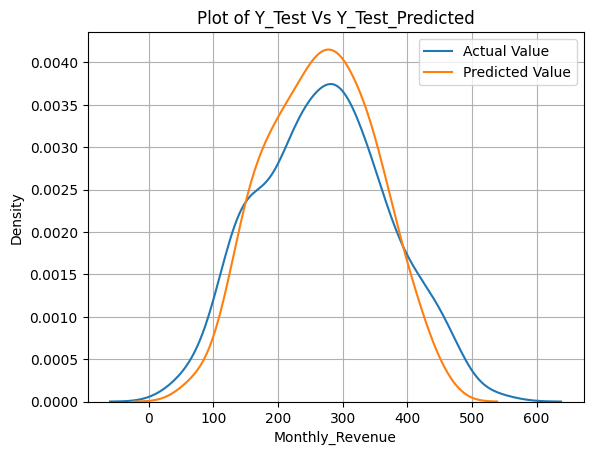

In [26]:
print(f"The Train r2 score is: {r2_score(y_train,y_pred_train_rfr)}")  
print(f"The RMSE score for Train data is: {mean_squared_error(y_train,y_pred_train_rfr,squared=False)}")  
sns.kdeplot(y_train,label='Actaul Value')
sns.kdeplot(y_pred_train_rfr,label='Predicted Value')
plt.grid()
plt.title('Plot of Y_Train Vs Y_Train_Predicted')
plt.legend()
plt.show()
print("--"*50)
print(f"The Test r2 score is: {r2_score(y_test,y_pred_test_rfr)}")
print(f"The RMSE score for Test data is: {mean_squared_error(y_test,y_pred_test_rfr,squared=False)}")
sns.kdeplot(y_test,label='Actual Value')
sns.kdeplot(y_pred_test_rfr,label='Predicted Value')
plt.grid()
plt.title('Plot of Y_Test Vs Y_Test_Predicted')
plt.legend()
plt.show()

# KNeighbors Regressor

In [27]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [28]:
y_pred_test_knn = knn.predict(x_test)
y_pred_train_knn = knn.predict(x_train)

In [29]:
r2_score_test_knn = r2_score(y_test,y_pred_test_knn)
r2_score_train_knn = r2_score(y_train,y_pred_train_knn)

The Train r2 score is: 0.6805050666682485
The RMSE score for Train data is: 59.875743069092984


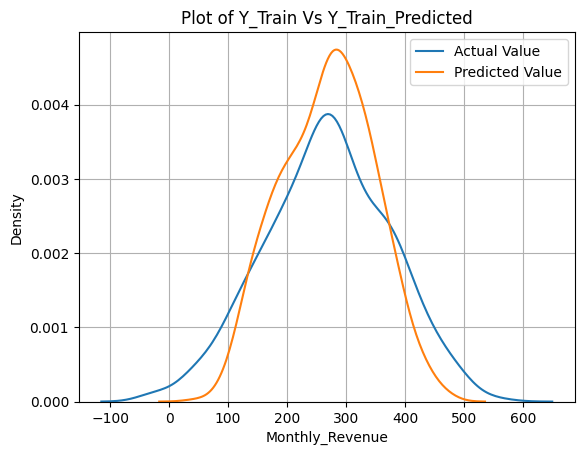

----------------------------------------------------------------------------------------------------
The Test r2 score is: 0.5596900345449687
The RMSE score for Test data is: 65.74285979160994


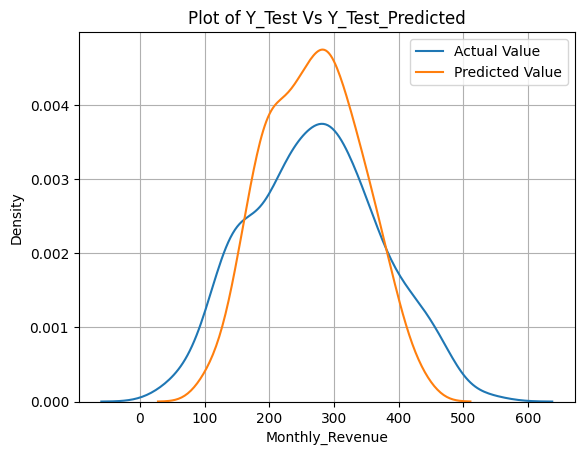

In [30]:
print(f"The Train r2 score is: {r2_score(y_train,y_pred_train_knn)}")  
print(f"The RMSE score for Train data is: {mean_squared_error(y_train,y_pred_train_knn,squared=False)}")  
sns.kdeplot(y_train,label='Actual Value')
sns.kdeplot(y_pred_train_knn,label='Predicted Value')
plt.grid()
plt.title('Plot of Y_Train Vs Y_Train_Predicted')
plt.legend()
plt.show()
print("--"*50)
print(f"The Test r2 score is: {r2_score(y_test,y_pred_test_knn)}")
print(f"The RMSE score for Test data is: {mean_squared_error(y_test,y_pred_test_knn,squared=False)}")
sns.kdeplot(y_test,label='Actual Value')
sns.kdeplot(y_pred_test_knn,label='Predicted Value')
plt.grid()
plt.title('Plot of Y_Test Vs Y_Test_Predicted')
plt.legend()
plt.show()

# Gradient boosting Regressor

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred_test_gbr = gbr.predict(x_test)
y_pred_train_gbr = gbr.predict(x_train)

In [32]:
r2_score_test_gbr = r2_score(y_test,y_pred_test_gbr)
r2_score_train_gbr = r2_score(y_train,y_pred_train_gbr)

The Train r2 score is: 0.8248130818424836
The RMSE score for Train data is: 44.337353329059226


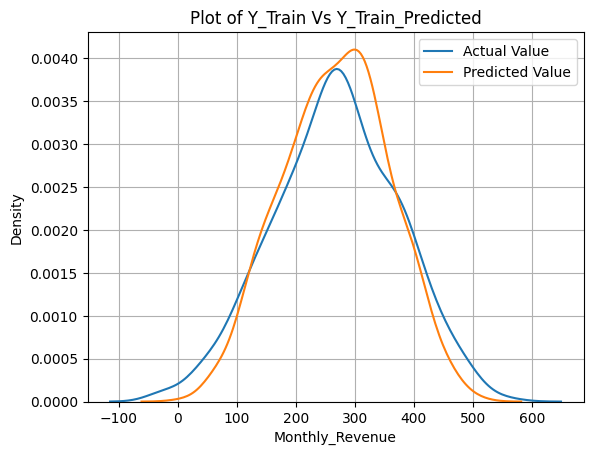

----------------------------------------------------------------------------------------------------
The Test r2 score is: 0.6373574312348687
The RMSE score for Test data is: 59.66349987110412


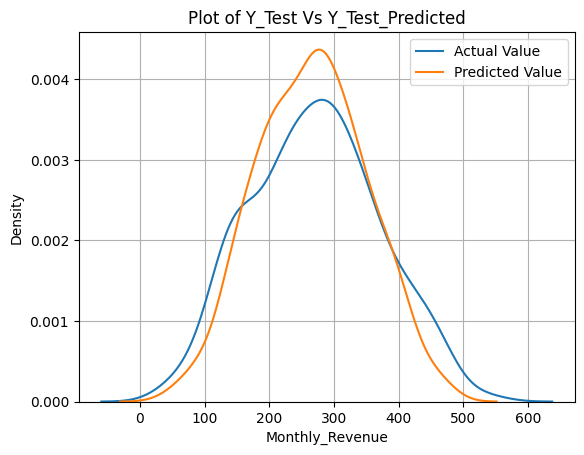

In [33]:
print(f"The Train r2 score is: {r2_score(y_train,y_pred_train_gbr)}")  
print(f"The RMSE score for Train data is: {mean_squared_error(y_train,y_pred_train_gbr,squared=False)}")  
sns.kdeplot(y_train,label="Actual Value")
sns.kdeplot(y_pred_train_gbr,label="Predicted Value")
plt.grid()
plt.title('Plot of Y_Train Vs Y_Train_Predicted')
plt.legend()
plt.show()
print("--"*50)
print(f"The Test r2 score is: {r2_score(y_test,y_pred_test_gbr)}")
print(f"The RMSE score for Test data is: {mean_squared_error(y_test,y_pred_test_gbr,squared=False)}")
sns.kdeplot(y_test,label='Actual Value')
sns.kdeplot(y_pred_test_gbr,label='Predicted Value')
plt.grid()
plt.title('Plot of Y_Test Vs Y_Test_Predicted')
plt.legend()
plt.show()

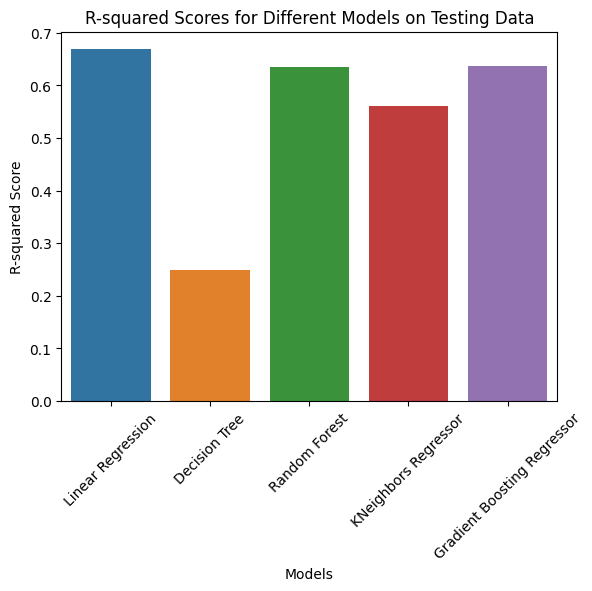

In [34]:
sns.barplot(x=['Linear Regression', 'Decision Tree', 'Random Forest', 'KNeighbors Regressor','Gradient Boosting Regressor'],
            y=[r2_score_lr_test, r2_score_dt_test, r2_score_rfr_test, r2_score_test_knn, r2_score_test_gbr])
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores for Different Models on Testing Data')
plt.xticks(rotation=45)
plt.show()

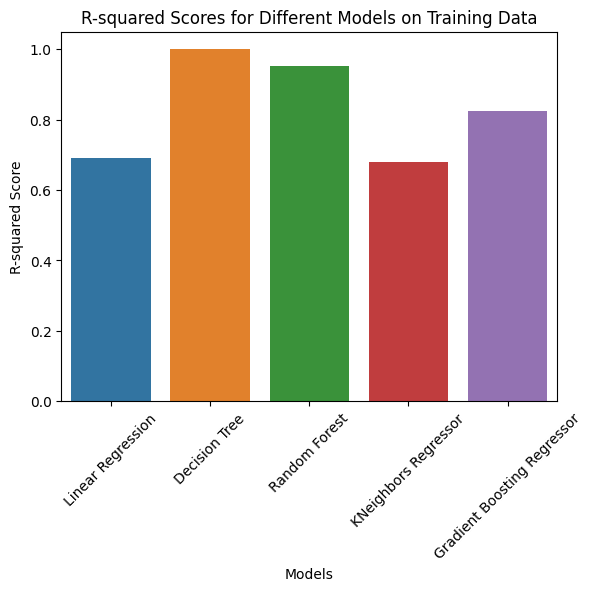

In [35]:
sns.barplot(x=['Linear Regression', 'Decision Tree', 'Random Forest', 'KNeighbors Regressor','Gradient Boosting Regressor'],
            y=[r2_score_lr_train, r2_score_dt_train, r2_score_rfr_train, r2_score_train_knn, r2_score_train_gbr])
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores for Different Models on Training Data')
plt.xticks(rotation=45)
plt.show()